In [1]:
# ac_survey and dplyr are available
library(dplyr)
# Load the ggplot2 package
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# URL to AC survey data
acs_url <- "http://s3.amazonaws.com/assets.datacamp.com/production/course_835/datasets/ac_survey.RData"

# Import data in .RData file at acs_url
load(url(acs_url))

# Print head of ac_survey
head(ac_survey, n= 20)

SCHL,ESR,PINCP
3,NA,NA
21,1,25000
1,NA,NA
21,1,20000
21,1,50000
24,6,600
17,1,327000
4,NA,NA
18,1,12000
19,1,65000


In [3]:
# data frame that translates SCHL to Degree
degree_codes <- data.frame(SCHL = c(21, 22, 24), Degree = c("Bachelor", "Masters", "Doctorate"))

# Add code to remove NAs, filter and join
ac_survey_clean <- ac_survey %>% 
    tbl_df() %>%
    na.omit() %>%
    filter(SCHL %in% c(21, 22, 24)) %>%
    inner_join(degree_codes)

Joining, by = "SCHL"


In [4]:
# Print out ac_survey_clean  
ac_survey_clean

# group_by() and summarize()
degree_holders <- ac_survey_clean %>%
    group_by(Degree) %>%
    summarise(count = n())

SCHL,ESR,PINCP,Degree
21,1,25000,Bachelor
21,1,20000,Bachelor
21,1,50000,Bachelor
24,6,600,Doctorate
21,1,85000,Bachelor
21,6,3600,Bachelor
22,6,26200,Masters
21,1,97000,Bachelor
24,1,53000,Doctorate
21,1,45000,Bachelor


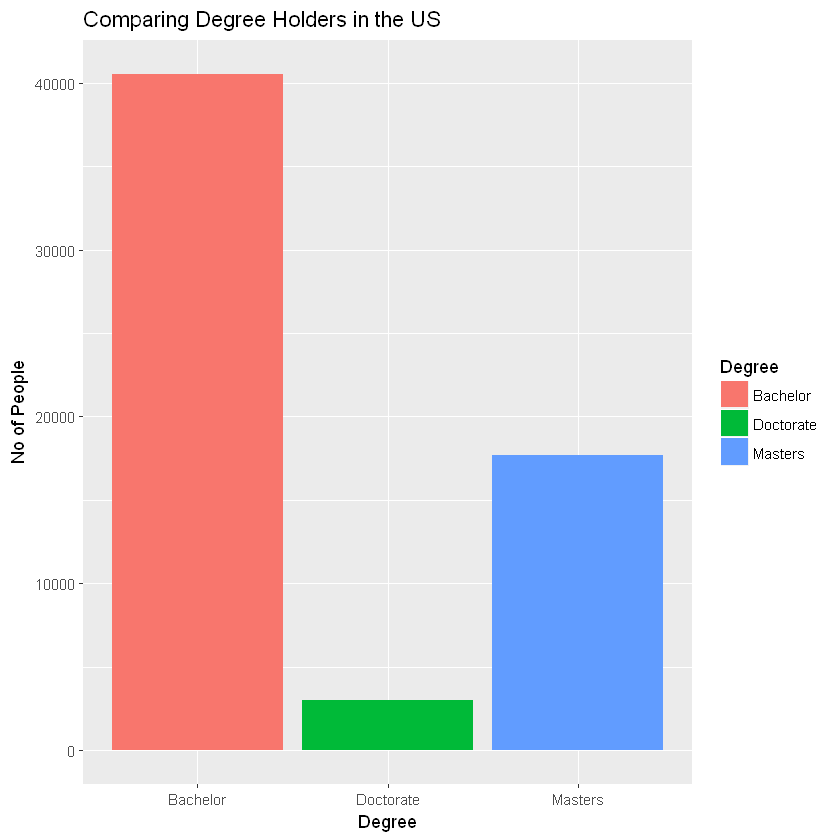

In [5]:
# Visualize the number of Bachelor, Master and PhD holders   
ggplot(degree_holders, aes(x = Degree, y = count, fill = Degree)) +                        
    geom_bar(stat = "identity") +
    xlab("Degree") + 
    ylab("No of People") + 
    ggtitle("Comparing Degree Holders in the US")

The End :)